In [139]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns 
import geopandas as gpd
import folium
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt

In [56]:
data_all = pd.read_csv("Iowa_Liquor_Sales.csv")
data_all.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [3]:
print("The entire dataset dimension: ",data_all.shape) # (12591077, 24)
print("Attributes:",data_all.columns) # (12591077, 24)

The entire dataset dimension:  (12591077, 24)
Attributes: Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')


In [5]:
# check missing values 
print("Missing values:\n",data_all.isnull().sum()) 

Missing values:
 Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64


In [57]:
# drop records with missing values 
data_all = data_all.dropna()

In [7]:
print("##################\n",data_all.groupby("City").size()) # 790 cities
print("##################\n",data_all.groupby("County").size()) # 200 cities
print("##################\n",data_all.groupby("Item Number").size())# 7263 brands

##################
 City
ACKLEY       2722
ADAIR        1567
ADEL        10878
AFTON         994
AKRON        2094
            ...  
Winthrop      994
Woodbine     2770
Woodward      605
ZWINGLE      1260
Zwingle       455
Length: 790, dtype: int64
##################
 County
ADAIR           2503
ADAMS           2066
ALLAMAKEE      11260
APPANOOSE      10076
AUDUBON         2143
               ...  
Winnebago      33984
Winneshiek     55567
Woodbury      287930
Worth          12643
Wright         27719
Length: 200, dtype: int64
##################
 Item Number
101       31
102       31
104       10
107       31
108       39
          ..
996026     3
997085     1
997086     3
997878     3
999275     1
Length: 7263, dtype: int64


In [33]:
# top three categories 
#l = data_all.loc[:, ["Volume Sold (Liters)", "Category"]].groupby("Category").sum()
#l = l.sort_values(by = "Volume Sold (Liters)", ascending = False).reset_index()
#l.iloc[:3, 0].to_list()

[1031080.0, 1012100.0, 1062310.0]

In [59]:
top_three_category = l.iloc[:3, 0].to_list()
#data = data_all.loc[data_all["Category"].isin(top_three_category),:]
data = data_all
data.Category.value_counts()
print(data.shape)

(12495974, 24)


### Pre-processing 

In [54]:
county_countN_df["County Number"].value_counts()

71.0    2
78.0    2
17.0    2
11.0    2
35.0    1
       ..
67.0    1
68.0    1
69.0    1
70.0    1
1.0     1
Name: County Number, Length: 99, dtype: int64

In [60]:
#pd.set_option('display.max_rows', 10)
data["County"] = data["County"].str.title()
data["City"] = data["City"].str.title()
county_countN_df = data.loc[:,["County","County Number","Date"]].groupby(["County","County Number"]).count().reset_index()
print("Counties with the same county number but conflicting names")
county_countN_df["County Number"].value_counts()
print(county_countN_df.loc[county_countN_df["County Number"].isin([71.0, 78.0,17.0, 11.0]),:])

data.County = data.County.replace(["Buena Vist","Cerro Gord",
                                   "Obrien","Pottawatta"], ["Buena Vista","Cerro Gordo",
                                                            "O'brien","Pottawattamie"])


Counties with the same county number but conflicting names
           County  County Number    Date
10     Buena Vist           11.0   24411
11    Buena Vista           11.0   95755
17     Cerro Gord           17.0   60573
18    Cerro Gordo           17.0  228400
72        O'Brien           71.0   63180
73         Obrien           71.0   19773
80     Pottawatta           78.0   90774
81  Pottawattamie           78.0  325135


In [61]:
# convert data types 
data["Date"]  = pd.to_datetime(data['Date'],format='%m/%d/%Y')
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day


data.loc[:,"Sale (Dollars)"] = data.loc[:, "Sale (Dollars)"].str[1:]
data.loc[:,"State Bottle Cost"] = data.loc[:, "State Bottle Cost"].str[1:]
data.loc[:,"State Bottle Retail"] = data.loc[:, "State Bottle Retail"].str[1:]
data["Store Number"] = data["Store Number"].astype("category")
data["County Number"] = data["County Number"].astype("int")
data["County Number"] = data["County Number"].astype("category")
data["County"] = data["County"].astype("category")
data["City"] = data["City"].astype("category")
data["Sale (Dollars)"] = data["Sale (Dollars)"].astype("float")
data["State Bottle Cost"] = data["State Bottle Cost"].astype("float")
data["State Bottle Retail"] = data["State Bottle Retail"].astype("float")

In [62]:
# remove potential errors 
cond1 = data["Bottle Volume (ml)"] == 0
cond2 = data["State Bottle Cost"] == 0
cond3 = data["State Bottle Retail"] == 0
cond4 = data["Sale (Dollars)"] == 0
cond5 = data["Bottles Sold"] ==0
cond6 = data["Volume Sold (Liters)"] ==0
data = data.loc[~(cond1|cond2|cond3|cond4|cond5|cond6),:] # 5039 rows removed
# = (12490935, 27)

In [63]:
data["latitude"]  = [re.findall(r"\((.+?),",i) for i in data["Store Location"]]
data["longitude"]  = [re.findall(r", (.+?)\)",i) for i in data["Store Location"]]
# 2981046 (about 600 records with missing coordinates)
filtered_coord = [len(data.iloc[i, 28]) != 0 for i in range(data.shape[0])]
filtered_coord
data_filtered = data.loc[filtered_coord, :]
data_filtered.latitude = data_filtered.latitude.map(lambda x:x[0])
data_filtered.longitude = data_filtered.longitude.map(lambda x:x[0])
data_filtered.latitude = data_filtered.latitude.astype("float")
data_filtered.longitude = data_filtered.longitude.astype("float")

In [64]:
data_filtered.County = data_filtered.County.str.title()

data_filtered["Profit"] = (data_filtered["State Bottle Retail"] - 
                           data_filtered["State Bottle Cost"])*data_filtered["Bottles Sold"]

In [65]:
data_filtered.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'year', 'month', 'day', 'latitude', 'longitude', 'Profit'],
      dtype='object')

In [76]:
data_filtered

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day,latitude,longitude,Profit
6,S28865700001,2015-11-09,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,Waterloo,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7,Black Hawk,...,6,104.58,9.0,2.38,2015,11,9,42.459938,-92.327917,34.86
13,S28866900001,2015-11-11,3650,"Spirits, Stogies and Stuff",118 South Main St.,Holstein,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47,Ida,...,1,17.43,1.5,0.40,2015,11,11,42.490073,-95.544793,5.81
18,S29134300126,2015-11-18,3723,J D Spirits Liquor,1023 9TH ST,Onawa,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",67,Monona,...,1,148.50,6.0,1.59,2015,11,18,42.025841,-96.095845,49.50
21,S29282800048,2015-11-23,2642,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,Pella,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",63,Marion,...,6,104.58,9.0,2.38,2015,11,23,41.397023,-92.899722,34.86
25,S28867000001,2015-11-04,3842,Bancroft Liquor Store,107 N PORTLAND ST PO BX 222,Bancroft,50517,107 N PORTLAND ST PO BX 222\nBANCROFT 50517\n(...,55,Kossuth,...,3,52.29,4.5,1.19,2015,11,4,43.293550,-94.218000,17.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,INV-08368000074,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,O'Brien,...,3,12.00,2.4,0.63,2017,10,31,43.184614,-95.854743,12.00
12591073,INV-08368000075,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,O'Brien,...,2,41.22,1.5,0.39,2017,10,31,43.184614,-95.854743,27.48
12591074,INV-08368000076,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,O'Brien,...,2,37.47,1.5,0.39,2017,10,31,43.184614,-95.854743,24.98
12591075,INV-08368000077,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,O'Brien,...,2,33.74,1.5,0.39,2017,10,31,43.184614,-95.854743,22.50


In [130]:
data_filtered.loc[data_filtered["Store Number"]==2659,:]

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day,latitude,longitude,Profit


In [66]:
print(data_filtered["Store Number"].value_counts()) # 1882
print(data_filtered["Store Name"].value_counts()) #  1893
#print(data_all.shape, data_filtered.shape)

2633    111641
4829     89200
2190     85657
2512     84645
2614     72129
         ...  
2478         0
2659         0
4121         0
5336         0
5057         0
Name: Store Number, Length: 1882, dtype: int64
Hy-Vee #3 / BDI / Des Moines           111641
Central City 2                          89200
Central City Liquor, Inc.               85657
Hy-Vee Wine and Spirits / Iowa City     84645
Hy-Vee #3 Food and Drugstore            72129
                                        ...  
Lonely Oak Distillery                       7
Templeton Rye                               6
Lonely Oak Distilery                        6
Best Case Wines                             2
Thome Enterprises LLC                       1
Name: Store Name, Length: 1893, dtype: int64


In [84]:
data_filtered.groupby(["Store Name","Store Number"]).size().reset_index()

,Store Name,Store Number,0
0,"""Double """"D"""" Liquor Store""",2106,0
1,"""Double """"D"""" Liquor Store""",2113,0
2,"""Double """"D"""" Liquor Store""",2130,0
3,"""Double """"D"""" Liquor Store""",2132,0
4,"""Double """"D"""" Liquor Store""",2152,0
...,...,...,...
3562621,Zapf's Pronto Market,9927,0
3562622,Zapf's Pronto Market,9928,0
3562623,Zapf's Pronto Market,9929,0
3562624,Zapf's Pronto Market,9930,0


In [102]:
c = data_filtered.loc[:,["Store Name",
                         "Store Number","Date"]].groupby(["Store Name",
                                                          "Store Number"]).count().reset_index()
print("Counties with the same county number but conflicting names")
c

Counties with the same county number but conflicting names


,Store Name,Store Number,Date
0,"""Double """"D"""" Liquor Store""",2106,NaN
1,"""Double """"D"""" Liquor Store""",2113,NaN
2,"""Double """"D"""" Liquor Store""",2130,NaN
3,"""Double """"D"""" Liquor Store""",2132,NaN
4,"""Double """"D"""" Liquor Store""",2152,NaN
...,...,...,...
3562621,Zapf's Pronto Market,9927,NaN
3562622,Zapf's Pronto Market,9928,NaN
3562623,Zapf's Pronto Market,9929,NaN
3562624,Zapf's Pronto Market,9930,NaN


In [126]:
pd.set_option('display.max_rows', 1951)
c = data_filtered[["Store Name","Store Number"]].drop_duplicates().sort_values(by = "Store Number").reset_index()
c

,index,Store Name,Store Number
0,379,Hillstreet News and Tobacco,2106
1,268,Jamboree Foods,2113
2,771,Sycamore Convenience,2130
3,1068,Spirits and Such,2132
4,602,Dugans Supermarket,2152
5,17240,Huber's Store Inc.,2161
6,9923341,"""Double """"D"""" Liquor Store""",2178
7,717,"Double ""D"" Liquor Store",2178
8,138,"Central City Liquor, Inc.",2190
9,834,Keokuk Spirits,2191


In [129]:
c.loc[c["Store Number"] == 3959,: ]

,index,Store Name,Store Number
458,9718828,Hartig Drug Company #8 / University / Dubuque,3959
459,272,Hartig Drug Company #8 / University,3959
460,11376841,Hartig Drug Company #8/University,3959


In [136]:
val_counts = c["Store Name"].value_counts()
val_counts[val_counts.values>1]
# c.value_counts("Store Number").index
# data_filtered.sort_values(by=["Store Name", "Store Number"]).unique()

Point Liquor & Tobacco                  3
Urban Liquor                            3
Sauce                                   3
Jeff's Market / Wilton                  3
Liquor and Tobacco Outlet /             3
Southside Tobacco & Liquor              2
Sac City Food Pride                     2
Liquor And Tobacco Outlet               2
Gasland #102 / Burlington               2
Iowa Distilling Company                 2
ThuLords                                2
New Star / Fort Dodge                   2
Jeff's Market / Durant                  2
Lil' Chubs Corner Stop                  2
Great Pastimes                          2
River Mart                              2
Famous Liquors                          2
Ida Grove Food Pride                    2
Huber's Store Inc.                      2
Rockwell Area Market                    2
Kellogg Country Store                   2
Sam's Mini Mart / Sioux City            2
Bluejay Market                          2
Broadbent Distillery              

In [68]:
c["Store Name"].value_counts()

CVS Pharmacy #10452  /  Ames            1882
Fareway Stores # 166/ Anamosa           1882
Kuennen's Liquor Store                  1882
Burg Spirits, Llc.                      1882
Shugar's Super Valu / Colfax            1882
                                        ... 
Sam's Club 8238 / Davenport             1882
Food & Gas Mart  /  Marshalltown        1882
Hy-Vee Food Store / Clarinda            1882
Hawkeye Convenience Store Wiley Blvd    1882
Smokin' Joe's #16 Tobacco and Liquor    1882
Name: Store Name, Length: 1893, dtype: int64

In [24]:
data_filtered["Store Number"].value_counts()

2512    15059
2501    12972
2515    12600
3495    12552
2190    12164
        ...  
2478        0
4121        0
5381        0
3615        0
4469        0
Name: Store Number, Length: 1864, dtype: int64

In [15]:
data_filtered

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day,latitude,longitude,Profit
105,S29065400007,2015-11-16,2555,Hy-Vee Food Store / Keokuk,3111 MAIN,Keokuk,52632,"3111 MAIN\nKEOKUK 52632\n(40.414975, -91.403338)",56,Lee,...,12,148.56,9.00,2.38,2015,11,16,40.414975,-91.403338,49.56
114,S11716100038,2013-04-17,3990,Cork and Bottle / Oskaloosa,309 A AVE WEST,Oskaloosa,52577,"309 A AVE WEST\nOSKALOOSA 52577\n(41.296228, -...",62,Mahaska,...,2,37.30,1.50,0.40,2013,4,17,41.296228,-92.648153,13.10
116,S05702000043,2012-05-24,3912,Smokin' Joe's #14 Tobacco and Liquor,225 EDGEWOOD RD,Cedar Rapids,52405,225 EDGEWOOD RD\nCEDAR RAPIDS 52405\n(41.97341...,57,Linn,...,1,21.74,0.75,0.20,2012,5,24,41.973418,-91.715955,7.24
118,S27992700007,2015-09-21,4898,Burlington Shell,"130, S ROOSEVELT AVE",Burlington,52601,"130, S ROOSEVELT AVE\nBURLINGTON 52601\n(40.80...",29,Des Moines,...,10,41.30,2.00,0.53,2015,9,21,40.807959,-91.141422,13.80
122,S19526900004,2014-06-12,4819,Super Stop 2 / Altoona,2635 ADVENTURELAND DR,Altoona,50009,2635 ADVENTURELAND DR\nALTOONA 50009\n(41.6585...,77,Polk,...,6,62.28,10.50,2.77,2014,6,12,41.658540,-93.494642,20.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591042,INV-08368000044,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,Obrien,...,1,174.84,1.00,0.26,2017,10,31,43.184614,-95.854743,4.86
12591043,INV-08368000045,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,Obrien,...,1,113.28,1.00,0.26,2017,10,31,43.184614,-95.854743,3.15
12591044,INV-08368000046,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,Obrien,...,1,85.14,1.75,0.46,2017,10,31,43.184614,-95.854743,4.73
12591045,INV-08368000047,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71,Obrien,...,2,89.76,3.50,0.92,2017,10,31,43.184614,-95.854743,9.98


In [137]:
data_filtered.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                   category
Store Name                       object
Address                          object
City                           category
Zip Code                         object
Store Location                   object
County Number                  category
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                       int64
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
year                              int64


### Visualisation 

<AxesSubplot:>

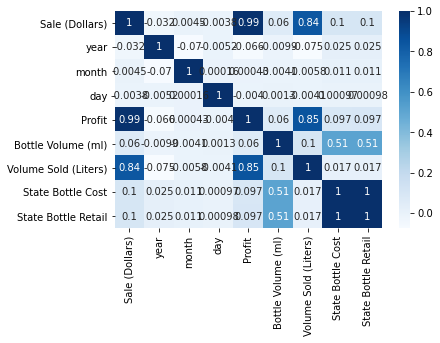

In [140]:
cor = data_filtered[["Sale (Dollars)","year","month","day",
                     "Profit","Bottle Volume (ml)","Volume Sold (Liters)","State Bottle Cost",
                     "State Bottle Retail"]].corr(method='pearson')
sns.heatmap(cor,annot = True,cmap= plt.cm.Blues)

#plt.show()
#plt.savefig('heatmap1.pdf')


###  scatter plot profit vs volume 

### scatter plot sale vs volume 

### boxplot of volume vs weekday 

In [73]:
sf = gpd.read_file("county.shp")
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
gdf_PUL = gpd.GeoDataFrame(pd.merge(data_filtered, sf, left_on = 'County', 
                                right_on = 'COUNTY')).drop('County', axis = 1)

geoJSON = gdf_PUL[['geometry','COUNTY']].drop_duplicates('COUNTY').to_json()
pd.set_option('display.max_rows', 103)
data_filtered.County.value_counts()

# Analyze total alcohol sales in different counties (chorolength)
volume_sold_df = data_filtered.loc[:, ["County", "Volume Sold (Liters)"]].groupby("County").sum().reset_index() # 103 counties

profit_df = data_filtered.loc[:, ["County", "Profit"]].groupby("County").sum().reset_index()


td_map = folium.Map(location = [41.8780, -93.0977], 
                    zoom_start= 10,tiles = "cartodbpositron")

cho_map = folium.Choropleth(
    geo_data=geoJSON,
    data=volume_sold_df[['County','Volume Sold (Liters)']],
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    key_on = 'feature.properties.COUNTY',
    line_opacity=0.2,
    legend_name='Volume Sold (Liters)',
    highlight=True,
    line_color='green',
    columns = ['County','Volume Sold (Liters)'], reset = True,
).add_to(td_map)

cho_map.geojson.add_child(folium.features.GeoJsonTooltip(['COUNTY'], labels = False))
folium.LayerControl().add_to(td_map)
td_map.save('foliumChoropleth_map_volume_sold.html')
td_map

In [ ]:
td_map = folium.Map(location = [41.8780, -93.0977], 
                    zoom_start= 10,tiles = "cartodbpositron")

cho_map = folium.Choropleth(
    geo_data=geoJSON,
    data=profit_df[['County','Profit']],
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    key_on = 'feature.properties.COUNTY',
    line_opacity=0.2,
    legend_name='Profit',
    highlight=True,
    line_color='green',
    columns = ['County','Profit'], reset = True,
).add_to(td_map)

cho_map.geojson.add_child(folium.features.GeoJsonTooltip(['COUNTY'], labels = False))
folium.LayerControl().add_to(td_map)
#td_map.save('foliumChoroplethMap_trip_distance.html')
td_map

In [20]:
data_all.Category.value_counts()

1031080.0    1255745
1012100.0    1199556
1011200.0     698830
1031200.0     641448
1011100.0     551093
              ...   
1082390.0         16
1032230.0         14
1700000.0         12
1041000.0          1
1082300.0          1
Name: Category, Length: 104, dtype: int64

In [17]:
data_filtered.loc[:, ["Category", 
                      "County", 
                      "Volume Sold (Liters)"]].groupby(["Category", "County"]).sum().reset_index()

,Category,County,Volume Sold (Liters)
0,1012100.0,Adair,36327.43
1,1012100.0,Adams,8752.62
2,1012100.0,Allamakee,37179.45
3,1012100.0,Appanoose,48045.19
4,1012100.0,Audubon,18219.32
...,...,...,...
296,1062310.0,Winnebago,25873.73
297,1062310.0,Winneshiek,36481.77
298,1062310.0,Woodbury,229256.33
299,1062310.0,Worth,8583.65
